In [1]:
import os
import pandas as pd
import numpy as np

def process_temperature_data(data_folder, exam_name, exam_duration):
    students = [f"S{i}" for i in range(1, 11)]
    temp_data = {}
    
    for student in students:
        file_path = os.path.join(data_folder, student, exam_name, "TEMP.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, header=None)
            start_time = df.iloc[0, 0]
            sample_rate = df.iloc[1, 0]
            temp_values = df.iloc[2:, 0].values.astype(float)
            timestamps = start_time + np.arange(len(temp_values)) / sample_rate
            temp_df = pd.DataFrame({
                "minute": ((timestamps - start_time) / 60).astype(int),
                f"{student.lower()}_{exam_name.lower()}_TEMP": temp_values
            })
            temp_data[student] = temp_df
    
    merged_df = None
    for df in temp_data.values():
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge_asof(merged_df, df, on="minute", direction="nearest")
    
    grouped_df = merged_df.groupby("minute").mean()
    grouped_df.reset_index(inplace=True)
    
    grouped_df = grouped_df.iloc[:exam_duration + 1]
    grouped_df["test_progress"] = grouped_df["minute"] / exam_duration
    temp_cols = [col for col in grouped_df.columns if "TEMP" in col]
    grouped_df["avg_TEMP"] = grouped_df[temp_cols].mean(axis=1)
    
    output_file = f"TEMP{exam_name.lower()}.csv"
    grouped_df.to_csv(output_file, index=False)
    print(f"Saved {output_file}")

project_folder = "RawData"
process_temperature_data(project_folder, "Final", 180)
process_temperature_data(project_folder, "Midterm 1", 90)
process_temperature_data(project_folder, "Midterm 2", 90)


Saved TEMPfinal.csv
Saved TEMPmidterm 1.csv
Saved TEMPmidterm 2.csv


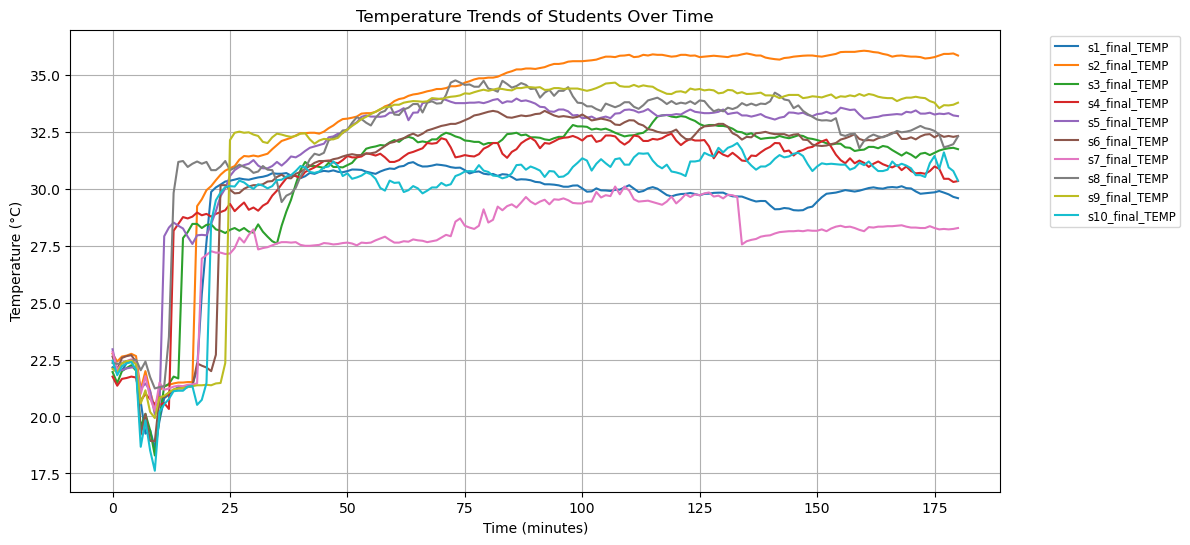

In [2]:
import matplotlib.pyplot as plt

# Load CSV file
file_path = "TEMPfinal.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

time = df["minute"]
student_columns = [col for col in df.columns if "_final_TEMP" in col]

plt.figure(figsize=(12, 6))
for student in student_columns:
    plt.plot(time, df[student], label=student)

# Formatting the plot
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trends of Students Over Time")
plt.legend(loc="upper right", fontsize="small", bbox_to_anchor=(1.2, 1))
plt.grid(True)

# Show the plot
plt.show()

In [3]:
def process_hr_data(data_folder, exam_name, exam_duration):
    students = [f"S{i}" for i in range(1, 11)]
    hr_data = {}
    
    for student in students:
        file_path = os.path.join(data_folder, student, exam_name, "HR.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, header=None)
            start_time = df.iloc[0, 0]
            sample_rate = df.iloc[1, 0]
            hr_values = df.iloc[2:, 0].values.astype(float)
            timestamps = start_time + np.arange(len(hr_values)) / sample_rate
            hr_df = pd.DataFrame({
                "minute": ((timestamps - start_time) / 60).astype(int),
                f"{student.lower()}_{exam_name.lower()}_HR": hr_values
            })
            hr_data[student] = hr_df
    
    merged_df = None
    for df in hr_data.values():
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge_asof(merged_df, df, on="minute", direction="nearest")
    
    grouped_df = merged_df.groupby("minute").mean()
    grouped_df.reset_index(inplace=True)
    
    grouped_df = grouped_df.iloc[:exam_duration + 1]
    grouped_df["test_progress"] = grouped_df["minute"] / exam_duration
    hr_cols = [col for col in grouped_df.columns if "HR" in col]
    grouped_df["avg_HR"] = grouped_df[hr_cols].mean(axis=1)
    
    output_file = f"HR{exam_name.lower()}.csv"
    grouped_df.to_csv(output_file, index=False)
    print(f"Saved {output_file}")


project_folder = "RawData"
process_hr_data(project_folder, "Final", 180)
process_hr_data(project_folder, "Midterm 1", 90)
process_hr_data(project_folder, "Midterm 2", 90)

Saved HRfinal.csv
Saved HRmidterm 1.csv
Saved HRmidterm 2.csv


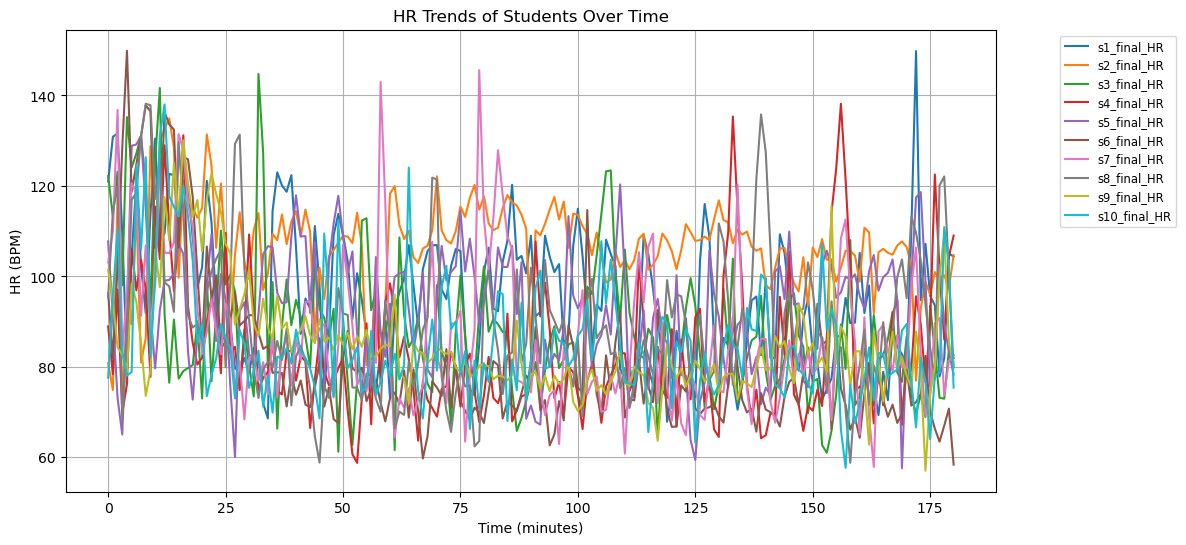

In [4]:
# Load CSV file
file_path = "HRfinal.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

time = df["minute"]
student_columns = [col for col in df.columns if "_final_HR" in col]

plt.figure(figsize=(12, 6))
for student in student_columns:
    plt.plot(time, df[student], label=student)

# Formatting the plot
plt.xlabel("Time (minutes)")
plt.ylabel("HR (BPM)")
plt.title("HR Trends of Students Over Time")
plt.legend(loc="upper right", fontsize="small", bbox_to_anchor=(1.2, 1))
plt.grid(True)

# Show the plot
plt.show()

In [5]:
def process_eda_data(data_folder, exam_name, exam_duration):
    students = [f"S{i}" for i in range(1, 11)]
    eda_data = {}
    
    for student in students:
        file_path = os.path.join(data_folder, student, exam_name, "EDA.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, header=None)
            start_time = df.iloc[0, 0]
            sample_rate = df.iloc[1, 0]
            eda_values = df.iloc[2:, 0].values.astype(float)
            timestamps = start_time + np.arange(len(eda_values)) / sample_rate
            eda_df = pd.DataFrame({
                "minute": ((timestamps - start_time) / 60).astype(int),
                f"{student.lower()}_{exam_name.lower()}_EDA": eda_values
            })
            eda_data[student] = eda_df
    
    merged_df = None
    for df in eda_data.values():
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge_asof(merged_df, df, on="minute", direction="nearest")
    
    grouped_df = merged_df.groupby("minute").mean()
    grouped_df.reset_index(inplace=True)
    
    grouped_df = grouped_df.iloc[:exam_duration + 1]
    grouped_df["test_progress"] = grouped_df["minute"] / exam_duration
    eda_cols = [col for col in grouped_df.columns if "EDA" in col]
    grouped_df["avg_EDA"] = grouped_df[eda_cols].mean(axis=1)
    
    output_file = f"EDA{exam_name.lower()}.csv"
    grouped_df.to_csv(output_file, index=False)
    print(f"Saved {output_file}")


project_folder = "RawData"
process_eda_data(project_folder, "Final", 180)
process_eda_data(project_folder, "Midterm 1", 90)
process_eda_data(project_folder, "Midterm 2", 90)

Saved EDAfinal.csv
Saved EDAmidterm 1.csv
Saved EDAmidterm 2.csv


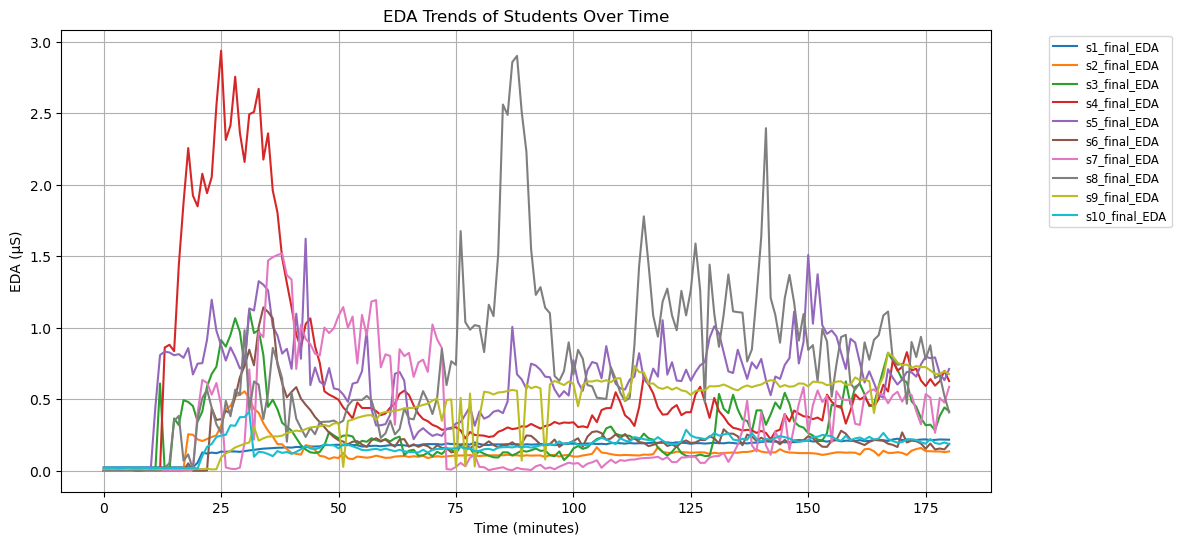

In [15]:
# Load CSV file
file_path = "EDAfinal.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

time = df["minute"]
student_columns = [col for col in df.columns if "_final_EDA" in col]

plt.figure(figsize=(12, 6))
for student in student_columns:
    plt.plot(time, df[student], label=student)

# Formatting the plot
plt.xlabel("Time (minutes)")
plt.ylabel("EDA (μS)")
plt.title("EDA Trends of Students Over Time")
plt.legend(loc="upper right", fontsize="small", bbox_to_anchor=(1.2, 1))
plt.grid(True)

# Show the plot
plt.show()

In [16]:
def process_bvp_data(data_folder, exam_name, exam_duration):
    students = [f"S{i}" for i in range(1, 11)]
    bvp_data = {}
    
    for student in students:
        file_path = os.path.join(data_folder, student, exam_name, "BVP.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, header=None)
            start_time = df.iloc[0, 0]
            sample_rate = df.iloc[1, 0]
            bvp_values = df.iloc[2:, 0].values.astype(float)
            timestamps = start_time + np.arange(len(bvp_values)) / sample_rate
            bvp_df = pd.DataFrame({
                "minute": ((timestamps - start_time) / 60).astype(int),
                f"{student.lower()}_{exam_name.lower()}_BVP": bvp_values
            })
            bvp_data[student] = bvp_df
    
    merged_df = None
    for df in bvp_data.values():
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge_asof(merged_df, df, on="minute", direction="nearest")
    
    grouped_df = merged_df.groupby("minute").mean()
    grouped_df.reset_index(inplace=True)
    
    grouped_df = grouped_df.iloc[:exam_duration + 1]
    grouped_df["test_progress"] = grouped_df["minute"] / exam_duration
    bvp_cols = [col for col in grouped_df.columns if "BVP" in col]
    grouped_df["avg_BVP"] = grouped_df[bvp_cols].mean(axis=1)
    
    output_file = f"BVP{exam_name.lower()}.csv"
    grouped_df.to_csv(output_file, index=False)
    print(f"Saved {output_file}")


project_folder = "RawData"
process_bvp_data(project_folder, "Final", 180)
process_bvp_data(project_folder, "Midterm 1", 90)
process_bvp_data(project_folder, "Midterm 2", 90)

Saved BVPfinal.csv
Saved BVPmidterm 1.csv
Saved BVPmidterm 2.csv


In [35]:
import os
import pandas as pd

def process_avg_feature_across_tests(feature):
    #Compute average values for a feature across all tests.
    test_files = {
        'final': f'CleanData/{feature}/{feature}final.csv',
        'mt1': f'CleanData/{feature}/{feature}midterm 1.csv',
        'mt2': f'CleanData/{feature}/{feature}midterm 2.csv'
    }
    
    dfs = {}
    for key, file in test_files.items():
        if os.path.exists(file):
            dfs[key] = pd.read_csv(file)
            dfs[key] = dfs[key][['minute', f'avg_{feature}']]
            dfs[key].rename(columns={f'avg_{feature}': f'{key}_avg_{feature}'}, inplace=True)
    
    merged_df = dfs['final']
    for key in ['mt1', 'mt2']:
        merged_df = pd.merge(merged_df, dfs[key], on='minute', how='outer')
    
    # Compute test progress assuming max duration of 180 min
    merged_df['test_progress'] = (merged_df['minute'] / 180) * 100
    
    # Save final merged file
    output_file = f'avg_{feature}_all_tests.csv'
    merged_df.to_csv(output_file, index=False)
    print(f'Saved: {output_file}')

# Example usage
features = ['TEMP', 'EDA', 'HR', 'BVP','STRESS']
for feature in features:
    process_avg_feature_across_tests(feature)

Saved: avg_TEMP_all_tests.csv
Saved: avg_EDA_all_tests.csv
Saved: avg_HR_all_tests.csv
Saved: avg_BVP_all_tests.csv
Saved: avg_STRESS_all_tests.csv


In [34]:
import pandas as pd
import numpy as np
import os

# Define paths
clean_data_path = "CleanData"
features = ["HR", "TEMP", "BVP"]
exams = ["final", "midterm 1", "midterm 2"]

# Load all data into a dictionary
data = {feature: {} for feature in features}
for feature in features:
    for exam in exams:
        file_path = os.path.join(clean_data_path, feature, f"{feature}{exam}.csv")
        if os.path.exists(file_path):
            data[feature][exam] = pd.read_csv(file_path)

# Compute global min/max values across all exams
global_min_max_values = {feature: (float("inf"), float("-inf")) for feature in features}

for feature in features:
    all_values = []
    for exam in exams:
        df = data[feature][exam].iloc[:, 1:-2]  # Exclude 'minute' and 'test_progress'
        all_values.extend(df.to_numpy().flatten())  # Flatten to list for min/max calculation
    global_min_max_values[feature] = (np.min(all_values), np.max(all_values))

# Function to compute stress level using global min/max
def compute_stress(value, min_val, max_val):
    return 100 * (value - min_val) / (max_val - min_val) if max_val != min_val else 0

# Compute stress per student and save new files
for exam in exams:
    stress_data = data["HR"][exam][["minute", "test_progress"]].copy()
    
    student_cols = [col for col in data["HR"][exam].columns if col.startswith("s") and "HR" in col]
    for student_col in student_cols:
        student_id = student_col.split("_")[0]  # Extract student ID (e.g., s1, s2)
        stress_values = np.zeros(len(stress_data))
        
        for feature in features:
            min_val, max_val = global_min_max_values[feature]
            feature_col = f"{student_id}_{exam}_{feature}"  # Match student feature column
            if feature_col in data[feature][exam]:
                stress_values += compute_stress(data[feature][exam][feature_col], min_val, max_val)
        
        stress_data[f"{student_id}_stress"] = stress_values / len(features)  # Normalize across features
    
    stress_data["avg_STRESS"] = stress_data.iloc[:, 2:].mean(axis=1)
    stress_data.to_csv(f"STRESS{exam}.csv", index=False)

print("Successful")


Successful


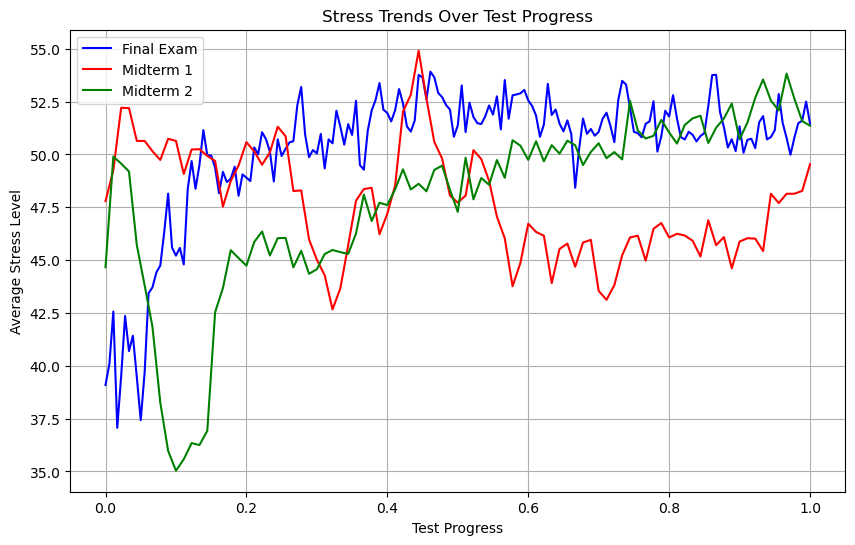

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV files
stress_final = pd.read_csv("CleanData/STRESS/STRESSfinal.csv")
stress_mid1 = pd.read_csv("CleanData/STRESS/STRESSmidterm 1.csv")
stress_mid2 = pd.read_csv("CleanData/STRESS/STRESSmidterm 2.csv")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stress_final['test_progress'], stress_final['avg_STRESS'], label='Final Exam', color='blue')
plt.plot(stress_mid1['test_progress'], stress_mid1['avg_STRESS'], label='Midterm 1', color='red')
plt.plot(stress_mid2['test_progress'], stress_mid2['avg_STRESS'], label='Midterm 2', color='green')

# Labels and Title
plt.xlabel("Test Progress")
plt.ylabel("Average Stress Level")
plt.title("Stress Trends Over Test Progress")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [1]:
import pandas as pd
import os

# Define folder paths and exam names
folders = ['STRESS', 'BVP', 'HR', 'TEMP']
exams = {'Midterm 1': 'midterm 1', 'Midterm 2': 'midterm 2', 'Final': 'final'}

# Initialize a dictionary to store average values
student_data = {'Student': [f'S{i}' for i in range(10)]}

# Process each folder (variable)
for folder in folders:
    for exam_name, exam_file in exams.items():
        file_path = f"CleanData/{folder}/{folder}{exam_file}.csv"
        df = pd.read_csv(file_path)
        
        # Compute average stress per student (columns s1_stress to s10_stress)
        student_averages = df.iloc[:, 2:12].mean()
        
        # Store the values in the dictionary
        student_data[f'avg_{folder.lower()}_{exam_name.lower().replace(" ", "_")}'] = student_averages.values

# Read the StudentGrades.csv file
grades_df = pd.read_csv("StudentGrades.csv")

# Add grades to the student_data dictionary
for exam_name in exams.keys():
    student_data[f'{exam_name.lower().replace(" ", "_")}_grade'] = grades_df[exam_name].values

# Create a DataFrame and save to CSV
student_avg_df = pd.DataFrame(student_data)
student_avg_df.to_csv("avg_student_data.csv", index=False)

print("avg_student_data.csv has been created successfully!")


avg_student_data.csv has been created successfully!


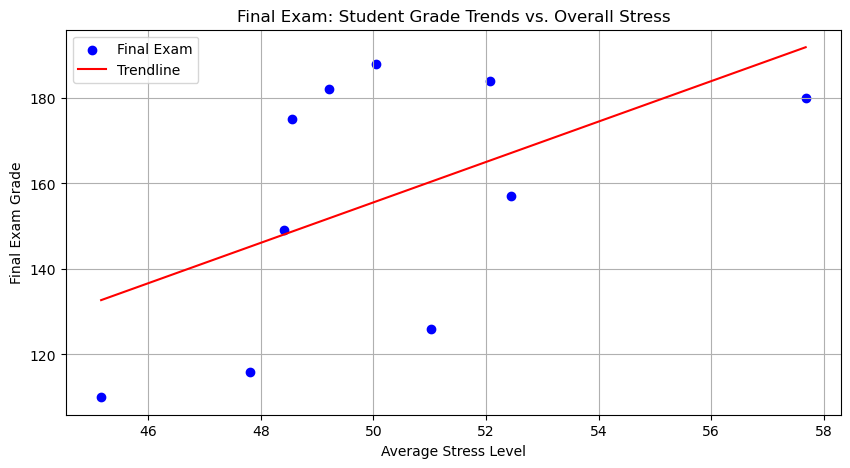

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(student_avg_df['avg_stress_final'], student_avg_df['final_grade'], color='b', label='Final Exam')

# Fit a linear trendline
slope, intercept = np.polyfit(student_avg_df['avg_stress_final'], student_avg_df['final_grade'], 1)

# Extend the trendline beyond the x-axis limits
x_range = np.linspace(min(student_avg_df['avg_stress_final']), max(student_avg_df['avg_stress_final']), 100)
trendline = slope * x_range + intercept

# Plot the extended trendline
plt.plot(x_range, trendline, color='r', label='Trendline')

# Labels and title
plt.xlabel("Average Stress Level")
plt.ylabel("Final Exam Grade")
plt.title("Final Exam: Student Grade Trends vs. Overall Stress")


# Adding legend and grid
plt.legend()
plt.grid()

# Display the plot
plt.show()



In [4]:
s10_finaltemp = pd.read_csv("RawData/S10/Final/temp.csv")
s10_finaltemp.mean()

1544027334.000000    26.331229
dtype: float64

In [5]:
import os
import pandas as pd

# Define paths
base_path = "RawData"
grades_path = "StudentGrades.csv"
output_file = "ProcessedStudentData.csv"

# Read student grades
grades_df = pd.read_csv(grades_path)

# Initialize an empty list to store processed data
data = []

# Iterate through each student folder (S1-S10)
for student_folder in sorted(os.listdir(base_path)):
    student_path = os.path.join(base_path, student_folder)
    
    if not os.path.isdir(student_path):
        continue  # Skip if it's not a directory

    student_id = student_folder  # Example: "S1"

    # Dictionary to store aggregated values
    student_data = {"Student": student_id}

    # Iterate through exam folders (Midterm 1, Midterm 2, Final)
    for exam_folder in ["Midterm 1", "Midterm 2", "Final"]:
        exam_path = os.path.join(student_path, exam_folder)
        
        if not os.path.isdir(exam_path):
            continue  # Skip if missing

        # Process each file type (HR, BVP, EDA, TEMP)
        for file_type in ["HR", "BVP", "EDA", "TEMP"]:
            file_path = os.path.join(exam_path, f"{file_type}.csv")
            
            if os.path.exists(file_path):
                df = pd.read_csv(file_path)
                
                # Compute the average value (assuming 1-column CSV)
                avg_value = df.iloc[:, 0].mean()
                
                # Construct the column name dynamically
                column_name = f"avg_{file_type.lower()}_{exam_folder.lower().replace(' ', '_')}"
                student_data[column_name] = avg_value
            else:
                column_name = f"avg_{file_type.lower()}_{exam_folder.lower().replace(' ', '_')}"
                student_data[column_name] = None  # Fill missing data with None

    # Append grades
    student_row = grades_df[grades_df["Student"] == student_id]
    if not student_row.empty:
        student_data["midterm_1_grade"] = student_row["Midterm 1"].values[0]
        student_data["midterm_2_grade"] = student_row["Midterm 2"].values[0]
        student_data["final_grade"] = student_row["Final"].values[0]
    
    data.append(student_data)

# Convert to DataFrame
processed_df = pd.DataFrame(data)

# Save to CSV
processed_df.to_csv(output_file, index=False)

print(f"Processed data saved to {output_file}")

Processed data saved to ProcessedStudentData.csv
